# Feature Scaling: Normalization
### 입력변수의 크기를 조절해 주는 것.

하는 이유: 단위 차이가 너무 심하다면 머신러닝 결과에 영향을 미칠 수 있고,<br>단위를 잘 맞춰서 더 좋은 효율을 내기 위함.

### min-max normalization
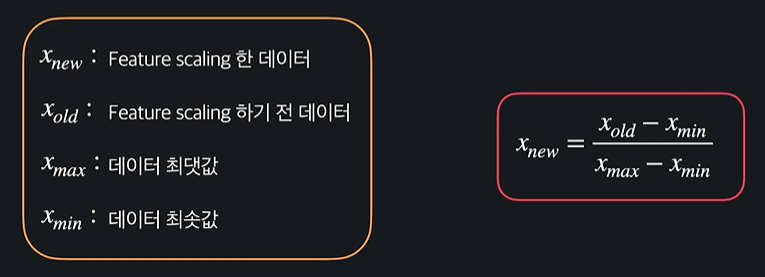

## min-max normalization 실습

In [4]:
import pandas as pd 
import numpy as np

from sklearn import preprocessing

In [18]:
NBA_FILE_PATH = 'datasets/NBA_player_of_the_week.csv'
nba_player_of_the_week_df = pd.read_csv(NBA_FILE_PATH)

In [21]:
nba_player_of_the_week_df.head()

,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Pre-draft Team,Real_value,Height CM,Weight KG,Last Season
0,Jayson Tatum,Boston Celtics,East,"Feb 10, 2020",SF,6'8,208,21,2017,2,2019-2020,2020,Duke,0.5,203,94,1
1,Nikola Jokic,Denver Nuggets,West,"Feb 10, 2020",C,7'0,250,25,2014,4,2019-2020,2020,KK Mega Bemax (Serbia),0.5,213,113,1
2,Jaylen Brown,Boston Celtics,East,"Feb 3, 2020",SF,6'7,220,23,2016,3,2019-2020,2020,California,0.5,201,99,1
3,Damian Lillard,Portland Trail Blazers,West,"Feb 3, 2020",G,6'3,195,29,2012,7,2019-2020,2020,Weber State,0.5,190,88,1
4,Pascal Siakam,Toronto Raptors,East,"Jan 27, 2020",F,6'9,230,25,2016,3,2019-2020,2020,New Mexico State,0.5,206,104,1


In [22]:
nba_player_of_the_week_df.describe()

,Weight,Age,Draft Year,Seasons in league,Season short,Real_value,Height CM,Weight KG,Last Season
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,224.567164,26.738060,1996.287313,5.740299,2003.156716,0.686940,201.071642,101.384328,0.023881
std,30.798885,3.400683,11.253558,3.293421,11.470164,0.242007,9.367970,14.011226,0.152734
min,150.000000,19.000000,1965.000000,0.000000,1980.000000,0.500000,175.000000,68.000000,0.000000
25%,205.000000,24.000000,1987.000000,3.000000,1994.000000,0.500000,193.000000,93.000000,0.000000
50%,220.000000,26.000000,1998.000000,5.000000,2005.000000,0.500000,201.000000,99.000000,0.000000
75%,250.000000,29.000000,2005.000000,8.000000,2013.000000,1.000000,208.000000,113.000000,0.000000
max,325.000000,40.000000,2018.000000,17.000000,2020.000000,1.000000,229.000000,147.000000,1.000000


In [23]:
height_weight_age_df = nba_player_of_the_week_df[['Height CM', 'Weight KG', 'Age']]

In [25]:
scaler = preprocessing.MinMaxScaler()

In [35]:
normalized_data = scaler.fit_transform(height_weight_age_df)


In [36]:
normalized_df = pd.DataFrame(normalized_data, columns = ['Height CM', 'Weight KG', 'Age'])
normalized_df

,Height CM,Weight KG,Age
0,0.518519,0.329114,0.095238
1,0.703704,0.569620,0.285714
2,0.481481,0.392405,0.190476
3,0.277778,0.253165,0.476190
4,0.574074,0.455696,0.285714
...,...,...,...
1335,0.240741,0.139241,0.238095
1336,0.574074,0.594937,0.047619
1337,0.481481,0.379747,0.238095
1338,0.388889,0.215190,0.238095


In [34]:
normalized_df.describe()

,Height CM,Weight KG,Age
count,1340.000000,1340.000000,1340.000000
mean,0.482808,0.422586,0.368479
std,0.173481,0.177357,0.161937
min,0.000000,0.000000,0.000000
25%,0.333333,0.316456,0.238095
50%,0.481481,0.392405,0.333333
75%,0.611111,0.569620,0.476190
max,1.000000,1.000000,1.000000


#### 경사하강법을 시행 할 때, 데이터 전처리가 되어 있다면 더 빠르게 시행됨.

## 표준화 하기


In [39]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
    
NBA_FILE_PATH = 'datasets/NBA_player_of_the_week.csv'
# 소수점 5번째 자리까지만 출력되도록 설정
pd.set_option('display.float_format', lambda x: '%.5f' % x)
    
nba_player_of_the_week_df = pd.read_csv(NBA_FILE_PATH)
    
# 데이터를 standardize 함
scaler = preprocessing.StandardScaler()
standardized_data = scaler.fit_transform(height_weight_age_df)
    
standardized_df = pd.DataFrame(standardized_data, columns=['Height', 'Weight', 'Age'])
standardized_df

,Height,Weight,Age
0,0.20592,-0.52723,-1.68796
1,1.27379,0.82934,-0.51128
2,-0.00765,-0.17024,-1.09962
3,-1.18230,-0.95561,0.66539
4,0.52628,0.18675,-0.51128
...,...,...,...
1335,-1.39588,-1.59820,-0.80545
1336,0.52628,0.97213,-1.98212
1337,-0.00765,-0.24163,-0.80545
1338,-0.54158,-1.16981,-0.80545


# One-hot Encoding

범주형(categorial)데이터를 수치형 데이터로 변환해주는 것 

범주형데이터를 column로 만들고 0과 1로 채워주는 방식<br>(함부로 숫자와 대응시키면 엉뚱한 값이 도출될 수 있음.)

In [45]:
import pandas as pd

TITANIC_FILE_PATH = 'datasets/titanic.csv'

In [47]:
titanic_df = pd.read_csv(TITANIC_FILE_PATH)
titanic_df.head()

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,NaN,S
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.28330,C85,C
2,2,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,NaN,S
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,C123,S
4,4,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,NaN,S


In [49]:
titanic_sex_embarked = titanic_df[['Sex', 'Embarked']]
titanic_sex_embarked.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [53]:
one_hot_encoded_df = pd.get_dummies(titanic_sex_embarked)
one_hot_encoded_df.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [54]:
one_hot_encoded_df2 = pd.get_dummies(data = titanic_df, columns = ['Sex', 'Embarked'])
one_hot_encoded_df2

,Unnamed: 0,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,3,"Braund, Mr. Owen Harris",22.00000,1,0,A/5 21171,7.25000,NaN,0,1,0,0,1
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00000,1,0,PC 17599,71.28330,C85,1,0,1,0,0
2,2,1,3,"Heikkinen, Miss. Laina",26.00000,0,0,STON/O2. 3101282,7.92500,NaN,1,0,0,0,1
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00000,1,0,113803,53.10000,C123,1,0,0,0,1
4,4,0,3,"Allen, Mr. William Henry",35.00000,0,0,373450,8.05000,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,"Montvila, Rev. Juozas",27.00000,0,0,211536,13.00000,NaN,0,1,0,0,1
887,887,1,1,"Graham, Miss. Margaret Edith",19.00000,0,0,112053,30.00000,B42,1,0,0,0,1
888,888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.45000,NaN,1,0,0,0,1
889,889,1,1,"Behr, Mr. Karl Howell",26.00000,0,0,111369,30.00000,C148,0,1,1,0,0


In [56]:
one_hot_encoded_df2.columns

Index(['Unnamed: 0', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')